<a href="https://colab.research.google.com/github/utkarsh-prakash/Google-Colab-Notebooks/blob/main/Time_Series_Forecasting_using_FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fbprophet

In [2]:
import matplotlib as mpl
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')

In [4]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df=df.set_index('timestamp').resample("H").mean()

In [5]:
from fbprophet import Prophet

In [6]:
taxi_df=df.reset_index()[['timestamp','value']].rename({'timestamp':'ds','value':'y'}, axis='columns')

In [7]:
train=taxi_df[(taxi_df['ds'] >= '2014-07-01') & (taxi_df['ds'] <= '2015-01-27')]
test=taxi_df[(taxi_df['ds'] > '2015-01-27')]

In [8]:
train.shape

(5041, 2)

In [9]:
test_size = test.shape[0]
test.shape

(119, 2)

In [10]:
m = Prophet(changepoint_range=0.95)
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
future = m.make_future_dataframe(periods=test_size,freq='H')
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-07-01 00:00:00,14666.924981,8355.028166,18120.315693,14666.924981,14666.924981,-1426.192188,-1426.192188,-1426.192188,-117.996490,-117.996490,-117.996490,-1308.195699,-1308.195699,-1308.195699,0.0,0.0,0.0,13240.732792
1,2014-07-01 01:00:00,14667.429717,5808.943835,14877.271998,14667.429717,14667.429717,-4434.943544,-4434.943544,-4434.943544,-3226.071194,-3226.071194,-3226.071194,-1208.872350,-1208.872350,-1208.872350,0.0,0.0,0.0,10232.486172
2,2014-07-01 02:00:00,14667.934453,2054.348574,11294.931913,14667.934453,14667.934453,-7998.834995,-7998.834995,-7998.834995,-6885.915493,-6885.915493,-6885.915493,-1112.919501,-1112.919501,-1112.919501,0.0,0.0,0.0,6669.099458
3,2014-07-01 03:00:00,14668.439189,-1198.196395,8203.556190,14668.439189,14668.439189,-11220.384918,-11220.384918,-11220.384918,-10199.470681,-10199.470681,-10199.470681,-1020.914237,-1020.914237,-1020.914237,0.0,0.0,0.0,3448.054270
4,2014-07-01 04:00:00,14668.943925,-2717.740831,6819.824323,14668.943925,14668.943925,-12651.533994,-12651.533994,-12651.533994,-11718.177460,-11718.177460,-11718.177460,-933.356534,-933.356534,-933.356534,0.0,0.0,0.0,2017.409931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,14367.817444,19143.342890,28435.465545,14359.612567,14376.100809,9410.711769,9410.711769,9410.711769,7236.132447,7236.132447,7236.132447,2174.579323,2174.579323,2174.579323,0.0,0.0,0.0,23778.529213
5156,2015-01-31 20:00:00,14367.836622,19506.389052,29051.111938,14359.464999,14376.094269,9974.747712,9974.747712,9974.747712,7906.242675,7906.242675,7906.242675,2068.505037,2068.505037,2068.505037,0.0,0.0,0.0,24342.584334
5157,2015-01-31 21:00:00,14367.855800,18619.241921,28032.509363,14359.327805,14376.087172,8851.441936,8851.441936,8851.441936,6901.704422,6901.704422,6901.704422,1949.737513,1949.737513,1949.737513,0.0,0.0,0.0,23219.297735
5158,2015-01-31 22:00:00,14367.874978,16273.762263,25810.004767,14359.239929,14376.266263,6659.480336,6659.480336,6659.480336,4840.679679,4840.679679,4840.679679,1818.800657,1818.800657,1818.800657,0.0,0.0,0.0,21027.355314


In [12]:
results=pd.concat([taxi_df.set_index('ds')['y'],forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]],axis=1).reset_index()
results

,ds,y,yhat,yhat_lower,yhat_upper
0,2014-07-01 00:00:00,9485.5,13240.732792,8355.028166,18120.315693
1,2014-07-01 01:00:00,5433.0,10232.486172,5808.943835,14877.271998
2,2014-07-01 02:00:00,3346.5,6669.099458,2054.348574,11294.931913
3,2014-07-01 03:00:00,2216.5,3448.054270,-1198.196395,8203.556190
4,2014-07-01 04:00:00,2189.5,2017.409931,-2717.740831,6819.824323
...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,23778.529213,19143.342890,28435.465545
5156,2015-01-31 20:00:00,24138.0,24342.584334,19506.389052,29051.111938
5157,2015-01-31 21:00:00,24194.5,23219.297735,18619.241921,28032.509363
5158,2015-01-31 22:00:00,26515.0,21027.355314,16273.762263,25810.004767


In [13]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [14]:
results = results.reset_index()
time = results['ds']
x = results['y']
forecast = results['yhat']

# Forecast


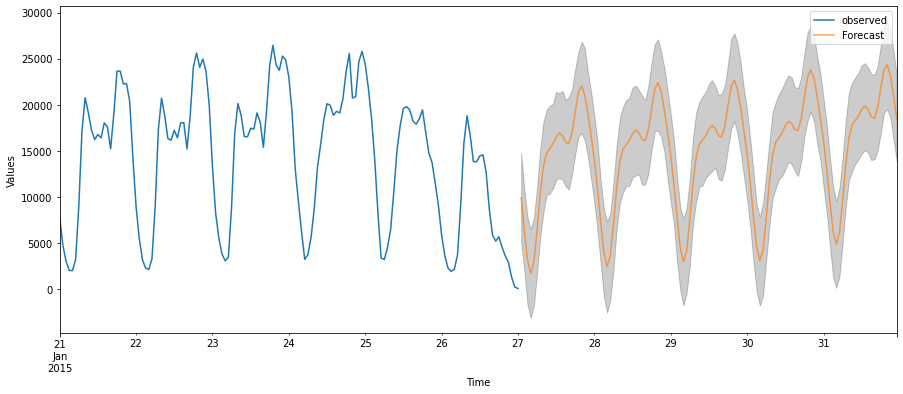

In [15]:
ax = results.loc[(results['ds'] >= '2015-01-21')&(results['ds'] <= '2015-01-27')].plot(x='ds', y='y', label='observed')
results.loc[(results['ds'] > '2015-01-27')].plot(x='ds', y='yhat', ax=ax, label='Forecast', alpha=.7, figsize=(15,6))
ax.fill_between(results.loc[(results['ds'] > '2015-01-27')]['ds'].tolist(),
                results.loc[(results['ds'] > '2015-01-27')]['yhat_lower'].tolist(),
                results.loc[(results['ds'] > '2015-01-27')]['yhat_upper'].tolist(), color='k', alpha=.2)
ax.set_xlabel('Time')
ax.set_ylabel('Values')
plt.legend()
plt.show()

# Performance on Whole dataset


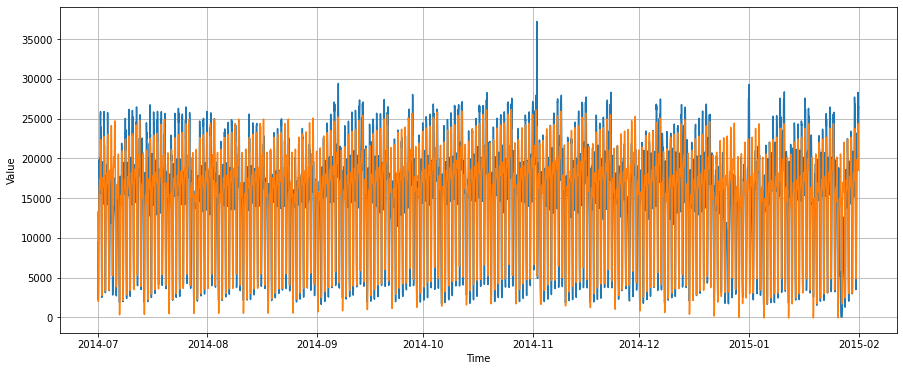

In [16]:
plt.figure(figsize=(15, 6))
plot_series(time, x)
plot_series(time, forecast)

In [17]:
tf.keras.metrics.mean_absolute_error(x,forecast).numpy()

2845.2081463774025

# Performance on test data


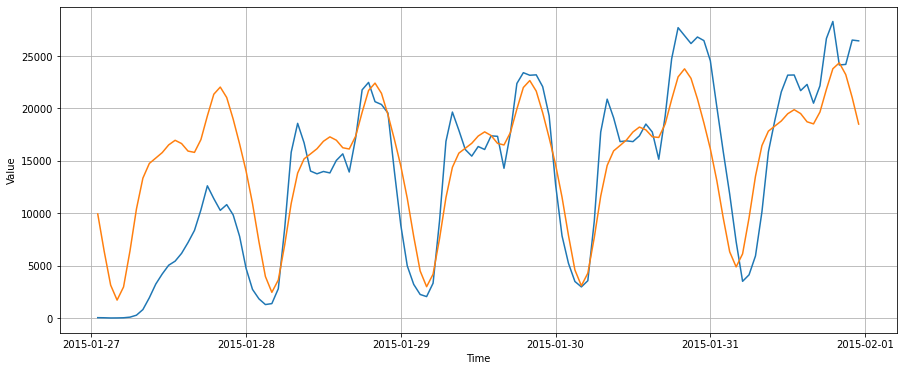

In [18]:
plt.figure(figsize=(15, 6))
plot_series(time, x, start=-test_size)
plot_series(time, forecast, start=-test_size)

In [19]:
tf.keras.metrics.mean_absolute_error(x[-test_size:],forecast[-test_size:]).numpy()

4031.187247570694